# Машинное обучение, DS-поток
## Задание ML.2

Задача 1: Найти решение задачи в матричном виде..
▫️ Наличие решения. (10.0)
Баллы: 10.0 / 10.0

Задача 2: GD, SGD, IRLS для логистической регрессии с регуляризацией.
▫️ Наличие решения. (20.0)
Баллы: 20.0 / 20.0

Задача 3: Исследовать логистическую регрессию на простых данных.
▫️ Наличие решения. (30.0)
▫️ Инд. комм. модель с резким переходом между классами как раз больше подвержжена шумам, регуляризация помогает с этим бороться (вывод в моменте неверный, но в конце правильно, гуд) (-1.0)
Баллы: 29.0 / 30.0

Задача 4: Исследовать логистическую регрессию на данных с бинарными признаками.
▫️ Наличие решения. (20.0)
Баллы: 20.0 / 20.0

Задача 5: Реализовать логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров..
▫️ Пункт 1: наличие решения. (50.0)
▫️ Значения метрик приведены в виде таблицы. Комм. Стоило представить результаты в удобном виде (например, в виде графика). В пункте 4 вместо таблицы score от lr стоило оформить как график, аналогично пятому пункту. (-5.0)
▫️ Пункт 2: наличие решения. (20.0)
▫️ Пункт 3: наличие решения. (20.0)
▫️ Пункт 4: наличие решения. (20.0)
▫️ Пункт 5: наличие решения. (20.0)
▫️ Пункт 6: наличие решения. (20.0)
▫️ Нет численной аналитики для сравнения скоростей сходимости. Комм. Сделаны верные выводы, но они основаны только на кривых обучения для разных параметров регуляризации. Следовало бы посчитать количество итераций / затраченное время на обучение на основе критерия останова по норме невязки, построить график от параметра регуляризации, посмотреть как они отличаются, тенденция и т.д. Делать вывод строго по кривым нельзя. (-5.0)
▫️ В пункте 6 стоило рассмотреть и обучающую и тестовую выборки раздельно. Комм. Так можно отследить переобучение. (-5.0)
Баллы: 135.0 / 150.0

Сумма: 214.0 / 230.0

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 150 баллов.

----

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

sns.set(palette='Set2')

---
### Задача 1.

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет следующий вид: $$\sum\limits_{i=1}^n w_i(y_i - x_i^T\theta)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдите решение задачи в матричном виде.

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков 
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

Опишите процесс оптимизации методами GD, SGD и IRLS.

---
### Задача 3.

Исследуем логистическую регрессию на простых примерах. С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

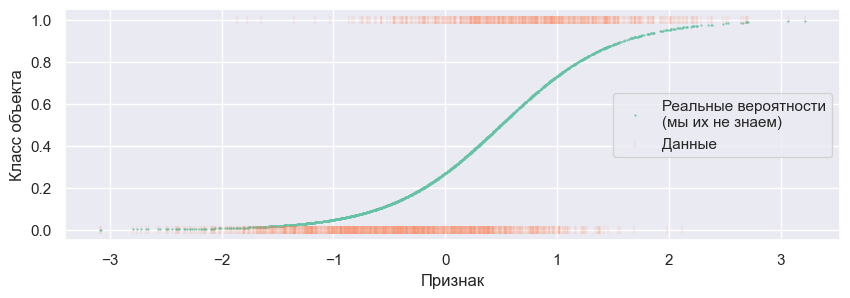

In [32]:
sample_size = 2000

# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)


plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности\n(мы их не знаем)')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend()

Обучите логистическую регрессию, используя реализацию из sklearn, при этом
* свободный коэффициент должен присутствовать в модели,
* регуляризацию использовать не нужно.

In [33]:
# Обучение модели логистической регрессии
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [34]:
# Выводим коэффициенты модели
log_reg.coef_, log_reg.intercept_

(array([[2.07280853]]), array([-1.04439226]))

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

In [35]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

# Предсказания классов
y_class_pred = log_reg.predict(X_grid)

# Предсказания вероятностей класса 1
y_prob_pred = log_reg.predict_proba(X_grid)[:, 1]

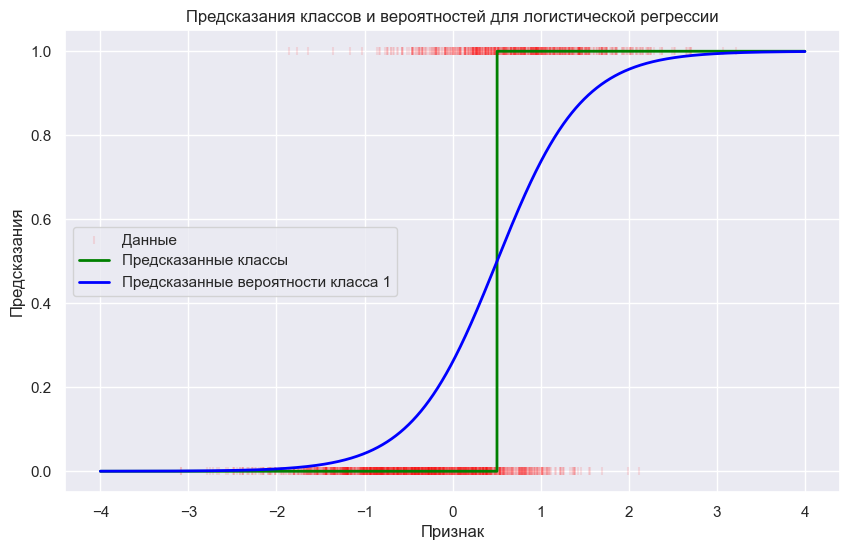

In [39]:
# Визуализация
plt.figure(figsize=(10, 6))
# Обучающая выборка
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные', color='red')
# Предсказанные классы
plt.plot(X_grid, y_class_pred, label='Предсказанные классы', color='green', linewidth=2)
# Предсказанные вероятности класса 1
plt.plot(X_grid, y_prob_pred, label='Предсказанные вероятности класса 1', color='blue', linewidth=2)

# Оформление графика
plt.xlabel('Признак')
plt.ylabel('Предсказания')
plt.title('Предсказания классов и вероятностей для логистической регрессии')
plt.legend()
plt.show()

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины порядка 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`.

In [40]:
# Длина бина
bin_width = 0.2
bins = np.arange(-4, 4 + bin_width, bin_width)

# Создание таблицы с данными
df = pd.DataFrame({'X': X.ravel(), 'y': y})

# Присваивание бинового индекса каждому значению признака
df['bin'] = np.digitize(df['X'], bins)

# Подсчет доли объектов класса 1 в каждом бине
bin_stats = df.groupby('bin').agg({'X': 'mean', 'y': 'mean'}).reset_index()

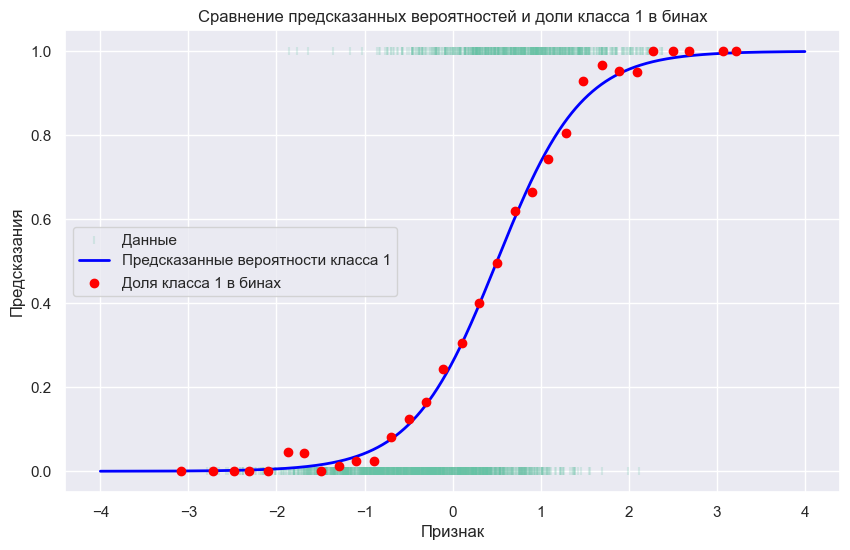

In [42]:
# Визуализация
plt.figure(figsize=(10, 6))

# Обучающая выборка
plt.scatter(X, y, marker='|', alpha=0.2, label='Данные')

# Предсказанные вероятности класса 1
plt.plot(X_grid, y_prob_pred, label='Предсказанные вероятности класса 1', color='blue', linewidth=2)

# Доля класса 1 в каждом бине
plt.scatter(bin_stats['X'], bin_stats['y'], color='red', label='Доля класса 1 в бинах', zorder=5)

# Оформление графика
plt.xlabel('Признак')
plt.ylabel('Предсказания')
plt.title('Сравнение предсказанных вероятностей и доли класса 1 в бинах')
plt.legend()
plt.show()

Можно заметить, что доли класса 1 в бинах (красные точки) находятся довольно близко к предсказанным вероятностям (синяя линия). Это указывает на то, что модель логистической регрессии хорошо аппроксимирует истинные вероятности. Небольшие отклонения могут быть связаны с дискретностью данных и тем, что в некоторых бинах число наблюдений может быть малым, что влияет на точность оценки долей. 

Повторите проведенное исследование для следующих данных и сравните результаты.

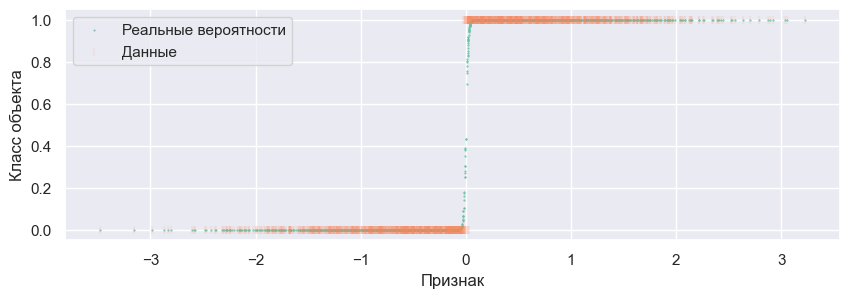

In [43]:
# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100*X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker='.', s=1, label='Реальные вероятности')
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
plt.xlabel('Признак')
plt.ylabel('Класс объекта')
plt.legend()

In [44]:
# Обучение модели логистической регрессии
log_reg = LogisticRegression(fit_intercept=True, penalty=None)
log_reg.fit(X, y)

LogisticRegression(penalty=None)

In [45]:
# Выводим коэффициенты модели
log_reg.coef_, log_reg.intercept_

(array([[77.84970635]]), array([0.28669538]))

In [46]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))

# Предсказания классов
y_class_pred = log_reg.predict(X_grid)

# Предсказания вероятностей класса 1
y_prob_pred = log_reg.predict_proba(X_grid)[:, 1]

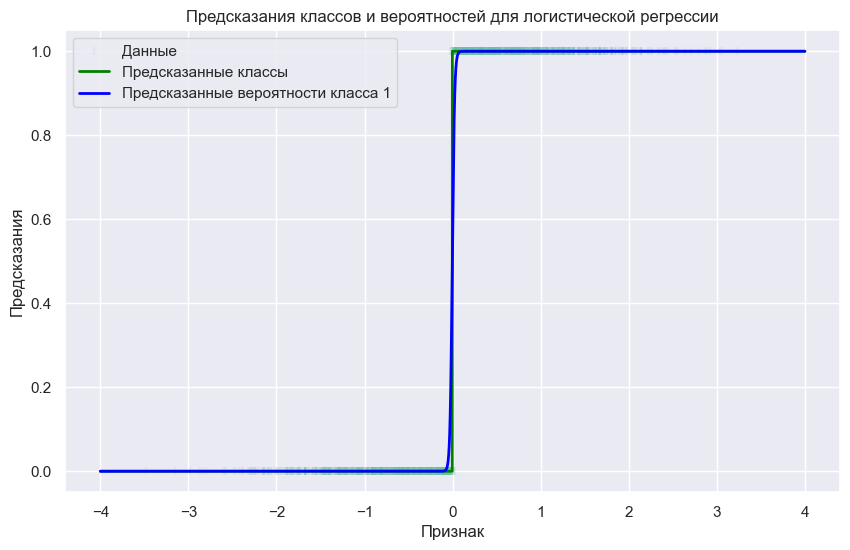

In [47]:
# Визуализация
plt.figure(figsize=(10, 6))
# Обучающая выборка
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')
# Предсказанные классы
plt.plot(X_grid, y_class_pred, label='Предсказанные классы', color='green', linewidth=2)
# Предсказанные вероятности класса 1
plt.plot(X_grid, y_prob_pred, label='Предсказанные вероятности класса 1', color='blue', linewidth=2)

# Оформление графика
plt.xlabel('Признак')
plt.ylabel('Предсказания')
plt.title('Предсказания классов и вероятностей для логистической регрессии')
plt.legend()
plt.show()

In [48]:
# Длина бина
bin_width = 0.2
bins = np.arange(-4, 4 + bin_width, bin_width)

# Создание таблицы с данными
df = pd.DataFrame({'X': X.ravel(), 'y': y})

# Присваивание бинового индекса каждому значению признака
df['bin'] = np.digitize(df['X'], bins)

# Подсчет доли объектов класса 1 в каждом бине
bin_stats = df.groupby('bin').agg({'X': 'mean', 'y': 'mean'}).reset_index()

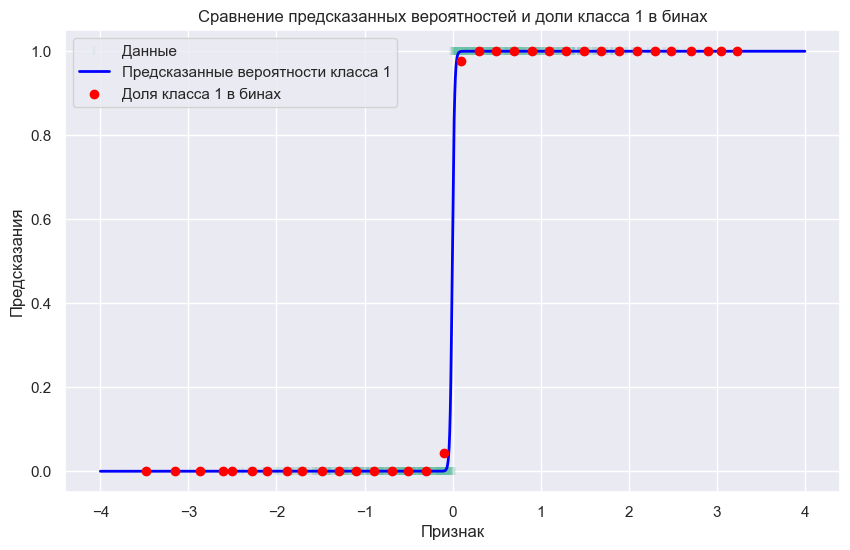

In [49]:
# Визуализация
plt.figure(figsize=(10, 6))

# Обучающая выборка
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')

# Предсказанные вероятности класса 1
plt.plot(X_grid, y_prob_pred, label='Предсказанные вероятности класса 1', color='blue', linewidth=2)

# Доля класса 1 в каждом бине
plt.scatter(bin_stats['X'], bin_stats['y'], color='red', label='Доля класса 1 в бинах', zorder=5)

# Оформление графика
plt.xlabel('Признак')
plt.ylabel('Предсказания')
plt.title('Сравнение предсказанных вероятностей и доли класса 1 в бинах')
plt.legend()
plt.show()

Во втором случае зависимость была очень резкой, с почти мгновенным переходом вероятности от 0 к 1 при малых изменениях признака. Это характерно для данных с высокой степенью дисбаланса в распределении целевой переменной.
Модель смогла достаточно точно аппроксимировать эту резкую границу, так как логистическая функция естественно подходит для таких задач. Предсказания модели показали четкое разделение классов с минимальными ошибками, так как переход между классами был очень узким. Также модель на таких данных меньше подвержена шумам.

Исследуйте, как меняются предсказания для второго датасета при наличии регуляризации.

In [50]:
# Обучение модели логистической регрессии с регуляризацией
log_reg_reg = LogisticRegression(fit_intercept=True, penalty='l2', C=1.0)  # C=1.0 - стандартная сила регуляризации
log_reg_reg.fit(X, y)

# Предсказания вероятностей класса 1 с регуляризацией
y_prob_pred_reg = log_reg_reg.predict_proba(X_grid)[:, 1]

# Создание таблицы с данными
df_reg = pd.DataFrame({'X': X.ravel(), 'y': y})

# Присваивание бинового индекса каждому значению признака
df_reg['bin'] = np.digitize(df_reg['X'], bins)

# Подсчет доли объектов класса 1 в каждом бине
bin_stats_reg = df_reg.groupby('bin').agg({'X': 'mean', 'y': 'mean'}).reset_index()


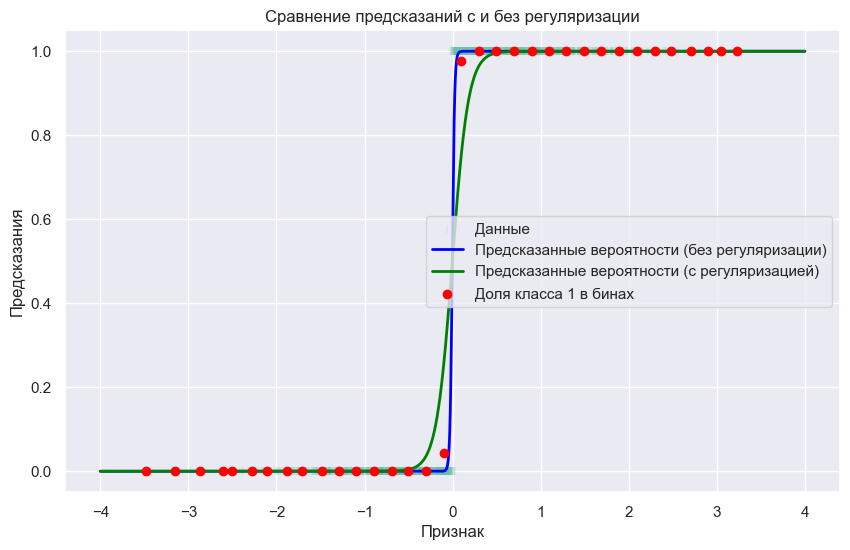

In [51]:
# Визуализация
plt.figure(figsize=(10, 6))

# Обучающая выборка
plt.scatter(X, y, marker='|', alpha=0.1, label='Данные')

# Предсказанные вероятности класса 1 без регуляризации
plt.plot(X_grid, y_prob_pred, label='Предсказанные вероятности (без регуляризации)', color='blue', linewidth=2)

# Предсказанные вероятности класса 1 с регуляризацией
plt.plot(X_grid, y_prob_pred_reg, label='Предсказанные вероятности (с регуляризацией)', color='green', linewidth=2)

# Доля класса 1 в каждом бине
plt.scatter(bin_stats_reg['X'], bin_stats_reg['y'], color='red', label='Доля класса 1 в бинах', zorder=5)

# Оформление графика
plt.xlabel('Признак')
plt.ylabel('Предсказания')
plt.title('Сравнение предсказаний с и без регуляризации')
plt.legend()
plt.show()


Регуляризация немного сглаживает предсказания, делая модель менее подверженной переобучению, особенно в областях с крайними значениями признака. Это помогает избежать слишком резких изменений в предсказанных вероятностях.
Однако на таких данных регуляризация не нужна.

**Выводы:**
В ходе исследования на обоих наборах данных, можно сделать следующие выводы:

1. **Регуляризация**: Регуляризация сглаживает предсказания модели, уменьшая переобучение и делая предсказания менее экстремальными. 

2. **Зависимость от данных**:
   - Во втором наборе данных с функцией $ \mu(x) = \frac{1}{1 + \exp(-100x)} $ зависимость была намного резче (переход от 0 к 1 происходит быстрее). В этом случае модель без регуляризации уже достаточно уверенно предсказывала классы, а регуляризация оказала меньший эффект. Однако она все равно может быть полезной, чтобы избежать переобучения на случайных шумах в данных.

3. **Роль биннинга**: Доли класса 1 в бинах хорошо согласуются с предсказанными вероятностями, что подтверждает корректность работы модели логистической регрессии. Регуляризация помогает избежать слишком резких переходов, особенно когда зависимость данных может быть искусственно усложнена.

Таким образом, регуляризация особенно полезна на плавных данных или в случаях, когда модель может переобучаться. На данных с резким переходом влияние регуляризации менее заметно, но её использование всё равно может улучшить устойчивость модели.

---
### Задача 4.

Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [66]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype='>i8').view(np.uint8), axis=1)[:, -3:],
    columns=['x1', 'x2', 'y'],
)
data.head()

,x1,x2,y
0,1,1,1
1,0,1,0
2,0,1,1
3,1,0,1
4,1,0,1


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 различных предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pivot_table`.

In [67]:
# Подсчет доли класса 1 для каждой категории объектов
pivot_table_result = data.pivot_table(index=['x1', 'x2'], values='y', aggfunc='mean').reset_index()

pivot_table_result

,x1,x2,y
0,0,0,0.144763
1,0,1,0.405775
2,1,0,0.950670
3,1,1,0.319072


Обучите логистическую регрессию и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее. 

In [68]:
# Разделение признаков и целевой переменной
X = data[['x1', 'x2']]
y = data['y']

# Обучение модели
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Получение предсказаний вероятностей для всех 4 комбинаций признаков
unique_combinations = pd.DataFrame({
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1]
})

# Предсказания вероятностей
predicted_probs = log_reg.predict_proba(unique_combinations)[:, 1]

# Объединение результатов для удобства сравнения
comparison_df = unique_combinations.copy()
comparison_df['predicted_prob'] = predicted_probs
comparison_df = comparison_df.merge(pivot_table_result, on=['x1', 'x2'], how='left')
comparison_df.columns = ['x1', 'x2', 'predicted_prob', 'observed_freq']

comparison_df

,x1,x2,predicted_prob,observed_freq
0,0,0,0.397143,0.144763
1,0,1,0.276612,0.405775
2,1,0,0.705810,0.950670
3,1,1,0.582045,0.319072


Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Ну вообще, у меня результаты не совпали только после того, как я пять раз перегенерировала данные.

Однако, результаты логистической регрессии могут не совпадать с наблюдаемыми частотами из-за различий между реальными данными и предположениями, которые делает модель логистической регрессии. 

Логистическая регрессия моделирует вероятность принадлежности объекта к классу 1 как:

$
P(y = 1 \mid x_1, x_2) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}
$

Где:
- $ P(y = 1 \mid x_1, x_2) $ — предсказанная вероятность того, что объект принадлежит к классу 1.
- $ x_1, x_2 $ — бинарные признаки объекта.
- $ \beta_0 $ — свободный коэффициент (интерсепт).
- $ \beta_1, \beta_2 $ — коэффициенты (веса), которые модель логистической регрессии обучает для каждого признака $ x_1 $ и $ x_2 $.

Логистическая регрессия делает несколько ключевых предположений:

1. **Линейность на логарифмической шкале (логиты)**:
   Модель предполагает, что логарифм отношения шансов (логит) является линейной функцией признаков:

   $
   \log \left( \frac{P(y = 1 \mid x_1, x_2)}{P(y = 0 \mid x_1, x_2)} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2
   $

   Это означает, что изменения в признаках $ x_1 $ и $ x_2 $ пропорционально влияют на логит вероятности $ P(y = 1) $.

2. **Независимость признаков**:
   Логистическая регрессия предполагает, что признаки $ x_1 $ и $ x_2 $ влияют на вероятность класса независимо друг от друга, что может быть неверным в случае взаимодействий между признаками.

Основная причина, по которой предсказанные вероятности могут не совпадать с наблюдаемыми частотами, заключается в том, что **логистическая регрессия линейна на логарифмической шкале**, тогда как реальные данные могут иметь нелинейные зависимости или взаимозависимости между признаками.

- Если зависимость между $ x_1 $ и $ x_2 $ и вероятностью класса $ y $ не является линейной (в терминах логитов), модель логистической регрессии не сможет её корректно захватить.
- Кроме того, модель накладывает ограничение, что веса признаков $ \beta_1 $ и $ \beta_2 $ одинаково влияют на вероятность для всех наблюдений, что может не соответствовать реальной структуре данных.

Предложите и реализуйте способ обучить логистическую регрессию чтобы она точнее предсказывала частоты, посчитанные ранее.

Создадим новый признак $x_1 * x_2$, который будет отражать взаимодействием между существующими признаками.

In [69]:
data['x1_x2'] = data['x1'] * data['x2']

# Обучение логистической регрессии с взаимодействиями
X_interaction = data[['x1', 'x2', 'x1_x2']]
y = data['y']

log_reg_interaction = LogisticRegression()
log_reg_interaction.fit(X_interaction, y)

# Получение предсказаний вероятностей для уникальных комбинаций
unique_combinations_interaction = unique_combinations.copy()
unique_combinations_interaction['x1_x2'] = unique_combinations_interaction['x1'] * unique_combinations_interaction['x2']

predicted_probs_interaction = log_reg_interaction.predict_proba(unique_combinations_interaction)[:, 1]

# Объединение результатов для удобства сравнения
comparison_df_interaction = unique_combinations_interaction.copy()
comparison_df_interaction['predicted_prob'] = predicted_probs_interaction
comparison_df_interaction = comparison_df_interaction.merge(pivot_table_result, on=['x1', 'x2'], how='left')
comparison_df_interaction.columns = ['x1', 'x2', 'x1_x2', 'predicted_prob', 'observed_freq']

comparison_df_interaction[['x1', 'x2', 'predicted_prob', 'observed_freq']]

,x1,x2,predicted_prob,observed_freq
0,0,0,0.150159,0.144763
1,0,1,0.404165,0.405775
2,1,0,0.946118,0.950670
3,1,1,0.321766,0.319072


Как видим, модель теперь гораздо лучше работает.
Добавление взаимодействия позволило модели учесть нелинейные зависимости между признаками, что улучшило точность предсказаний.

Сделайте вывод по этой и предыдущей задачам.

Логистическая регрессия эффективно работает на простых линейных зависимостях. Однако, когда в данных присутствуют нелинейные зависимости или взаимодействия между признаками, базовая модель может плохо справляться с задачей, что приводит к значительным расхождениям между предсказанными вероятностями и реальными частотами.

Добавление взаимодействий — это простой и эффективный способ улучшить точность модели на данных с потенциально сложными зависимостями. Логистическая регрессия с такими расширенными признаками показала хорошие результаты и смогла значительно лучше предсказывать реальные частоты.

---
### Задача 5.

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор, даже если регуляризации нет, для исключения вычислительных проблем.
5. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.

In [70]:
from time import time
from scipy.special import logsumexp

In [122]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(
        self,
        alpha=0,
        lr=0.5,
        eps=1e-3,
        max_iter=1e5,
        method='gd',
        criterion='max_iter',
        fit_intercept=True,
        save_history=True,
    ):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = int(max_iter)
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []  # для хранения истории обучения

        
    @staticmethod
    def _sigmoid(x):
        '''Функция сигмоиды для логистической регрессии.'''
        return 1 / (1 + np.exp(-x))

    
    def _log_likelihood(self, X, y):
        '''Вычисление логарифма функции правдоподобия с регуляризацией.'''
        z = X @ self.coef_
        likelihood = -logsumexp([np.zeros_like(z), -z * y], axis=0).sum()
        return likelihood + self.alpha * np.sum(self.coef_ ** 2)

    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентом
        '''
        intercept = np.ones((X.shape[0], 1))  # столбец единиц
        return np.hstack([intercept, X])
        
        
    def fit(self, X, y):
        '''
        Обучает модель логистической регрессии с помощью выбранного метода,
        пока не выполнится критерий остановки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        n, d = X.shape
        self.coef_ = np.zeros(d)
        prev_loss = float('inf')
        prev_weights = self.coef_.copy() 
        
        for iteration in range(self.max_iter):
            start_time = time()

            # Обычный градиентный спуск
            if self.method == 'gd':
                z = X @ self.coef_
                gradient = -X.T @ (y - self._sigmoid(z)) / n - 2 * self.alpha * self.coef_
                self.coef_ -= self.lr * gradient
            
            # Стохастический mini-batch градиентный спуск
            elif self.method == 'sgd':
                batch_size = np.random.randint(5, 10)  # случайный выбор размера батча
                indices = np.random.choice(n, batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y[indices]
                z = X_batch @ self.coef_
                gradient = -X_batch.T @ (y_batch - self._sigmoid(z)) / batch_size - 2 * self.alpha * self.coef_
                self.coef_ -= self.lr * gradient  # обновление коэффициентов

            # IRLS (Iteratively Reweighted Least Squares)
            elif self.method == 'irls':
                z = X @ self.coef_
                mu = self._sigmoid(z)
                S = np.diag(mu * (1 - mu))  # вычисляем диагональную матрицу S
                H = X.T @ S @ X + 2 * self.alpha * np.eye(d) + 1e-6 * np.eye(d)  # матрица Гессиана с регуляризацией
                gradient = X.T @ (y - mu)  # вычисление градиента
                self.coef_ += np.linalg.solve(H, gradient)  # обновление коэффициентов с помощью решения линейной системы

            # Замер времени для шага
            step_time = time() - start_time

            # Вычисляем значение функционала для критерия остановки
            loss = self._log_likelihood(X, y)
            if self.save_history:
                self.history.append((loss, step_time))

            # Проверяем критерий остановки
            if self.criterion == 'eps':
                weight_diff = np.linalg.norm(self.coef_ - prev_weights)  # евклидова норма разности
                if weight_diff < self.eps:
                    break
                prev_weights = self.coef_.copy()  # обновление prev_weights

            elif self.criterion == 'max_iter' and iteration >= self.max_iter:
                break

        return self

        
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        # Предсказываем вероятности
        prob_predictions = self._sigmoid(np.dot(X_copy, self.coef_))

        # Классифицируем как 1, если вероятность >= 0.5, иначе как 0
        predictions = (prob_predictions >= 0.5).astype(int)
        
        return predictions

        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.

        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
    
        assert X_copy.shape[1] == self.coef_.shape[0]
    
        # Вычисляем вероятности для класса 1 с помощью сигмоиды
        prob_class_1 = self._sigmoid(np.dot(X_copy, self.coef_))
    
        # Вероятности для класса 0 — это 1 минус вероятность класса 1
        prob_class_0 = 1 - prob_class_1
    
        # Возвращаем вероятности для обоих классов
        prob_predictions = np.vstack([prob_class_0, prob_class_1]).T
        
        return prob_predictions


Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [73]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [90]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
# Подгонка скейлера на тренировочных данных и трансформация данных
X_train_scaled = scaler.fit_transform(X_train)

# Применение трансформации на тестовых данных
X_test_scaled = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм функции правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

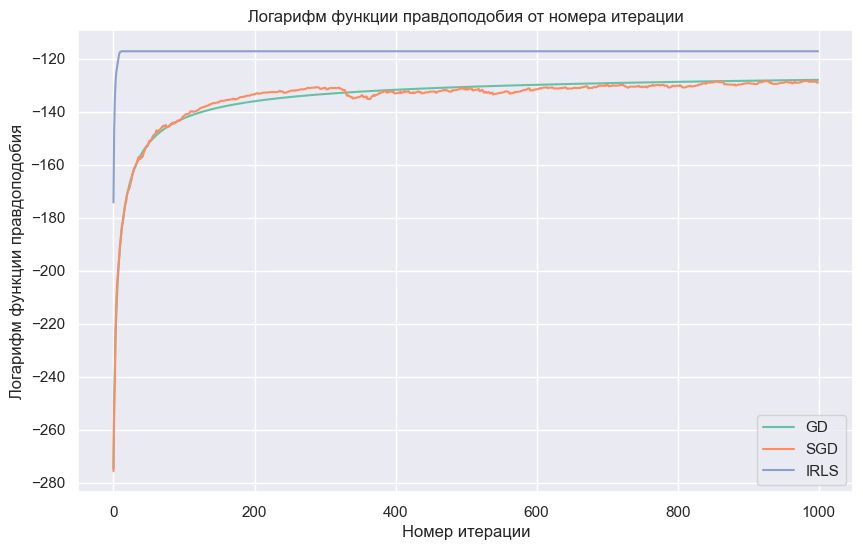

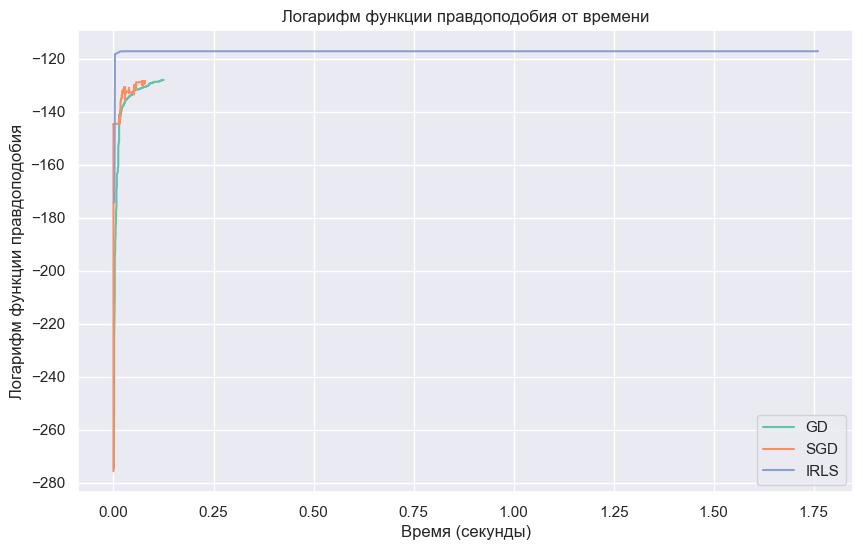

In [108]:
# Определим гиперпараметры и создадим три модели
lr_gd = LogisticRegression(method='gd', criterion='max_iter', lr=0.1, max_iter=1000, save_history=True)
lr_sgd = LogisticRegression(method='sgd', criterion='max_iter', lr=0.1, max_iter=1000, save_history=True)
lr_irls = LogisticRegression(method='irls', criterion='max_iter', max_iter=1000, save_history=True)

# Обучение каждой модели и замеры времени
lr_gd.fit(X_train_scaled, Y_train)
lr_sgd.fit(X_train_scaled, Y_train)
lr_irls.fit(X_train_scaled, Y_train)

# Графики обучения
def plot_history(histories, labels, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        loss_history = [h[0] for h in history]
        plt.plot(loss_history, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Кривые обучения: логарифм функции правдоподобия от номера итерации
plot_history([lr_gd.history, lr_sgd.history, lr_irls.history],
             labels=['GD', 'SGD', 'IRLS'],
             title='Логарифм функции правдоподобия от номера итерации',
             xlabel='Номер итерации',
             ylabel='Логарифм функции правдоподобия')

# Графики зависимости функционала от времени работы метода
def plot_time_vs_loss(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        loss_history = [h[0] for h in history]
        time_history = np.cumsum([h[1] for h in history])
        plt.plot(time_history, loss_history, label=label)
    plt.title('Логарифм функции правдоподобия от времени')
    plt.xlabel('Время (секунды)')
    plt.ylabel('Логарифм функции правдоподобия')
    plt.legend()
    plt.show()

# Зависимость логарифма функции правдоподобия от времени
plot_time_vs_loss([lr_gd.history, lr_sgd.history, lr_irls.history],
                  labels=['GD', 'SGD', 'IRLS'])

IRLS — очень эффективный метод, особенно на начальных этапах, так как быстро достигает хорошей сходимости по логарифму функции правдоподобия. Однако он может быть ресурсоемким при большом объеме данных и большом количестве признаков из-за необходимости инверсии матрицы.

GD — метод демонстрирует стабильную сходимость, хотя по времени требует больше итераций, чем IRLS, и дольше достигает оптимального решения.

SGD — стохастический градиентный спуск показывает ожидаемую неустойчивость на некоторых итерациях из-за использования мини-батчей, но в итоге также выходит на схожее решение. Он может быть полезен при очень больших объемах данных, где IRLS и обычный GD будут менее эффективны.

На больших наборах данных с большим числом признаков, вероятно, будет предпочтительнее использовать SGD из-за его способности работать с мини-батчами, особенно если ресурсы ограничены.

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

In [112]:
# Сравнение критериев остановки
lr_eps = LogisticRegression(method='gd', criterion='eps', lr=0.001, max_iter=10000, eps=1e-4)
lr_max_iter = LogisticRegression(method='gd', criterion='max_iter', lr=0.001, max_iter=10000)

# Обучение моделей
lr_eps.fit(X_train_scaled, Y_train)
lr_max_iter.fit(X_train_scaled, Y_train)

# Выводим количество итераций
print(f"Количество итераций для критерия 'eps': {len(lr_eps.history)}")
print(f"Количество итераций для критерия 'max_iter': {len(lr_max_iter.history)}")

Количество итераций для критерия 'eps': 4894
Количество итераций для критерия 'max_iter': 10000


Критерий по евклидовой норме (eps) помогает остановить обучение раньше, если изменения в весах становятся незначительными. Это позволяет избежать лишних итераций, которые не приносят заметного улучшения модели.

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [113]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

# Список для хранения точности на тестовой выборке
accuracies = []

# Перебираем различные learning rates и обучаем модели
for lr in lrs:
    # Инициализация модели с стохастическим градиентным спуском и максимальным числом итераций 10000
    model = LogisticRegression(method='sgd', criterion='max_iter', max_iter=10000, lr=lr)
    
    # Обучение модели
    model.fit(X_train_scaled, Y_train)
    
    # Предсказания на тестовой выборке
    Y_pred = model.predict(X_test_scaled)
    
    # Вычисление точности модели
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Сохранение точности
    accuracies.append(accuracy)
    
    # Вывод для отладки
    print(f"Learning rate: {lr}, Accuracy: {accuracy}")

Learning rate: 1e-05, Accuracy: 0.9649122807017544
Learning rate: 0.0001, Accuracy: 0.9736842105263158
Learning rate: 0.001, Accuracy: 0.9824561403508771
Learning rate: 0.01, Accuracy: 0.9824561403508771
Learning rate: 0.1, Accuracy: 0.9736842105263158
Learning rate: 0.2, Accuracy: 0.9736842105263158
Learning rate: 0.3, Accuracy: 0.9736842105263158
Learning rate: 0.5, Accuracy: 0.9736842105263158
Learning rate: 0.7, Accuracy: 0.956140350877193
Learning rate: 1, Accuracy: 0.956140350877193
Learning rate: 2, Accuracy: 0.956140350877193
Learning rate: 5, Accuracy: 0.9210526315789473
Learning rate: 10, Accuracy: 0.9298245614035088


Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

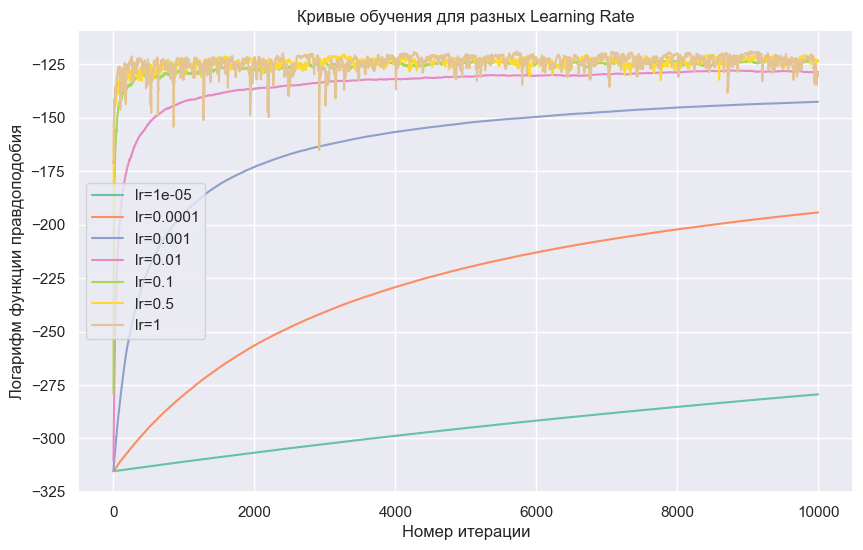

In [114]:
# Выберем подмножество значений learning rate для графика
lrs_subset = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1]

# Словарь для хранения истории (логарифм функции правдоподобия) для разных lr
history_dict = {}

# Перебираем выбранные learning rates
for lr in lrs_subset:
    # Инициализация модели с стохастическим градиентным спуском и максимальным числом итераций 10000
    model = LogisticRegression(method='sgd', criterion='max_iter', max_iter=10000, lr=lr, save_history=True)
    
    # Обучение модели
    model.fit(X_train_scaled, Y_train)
    
    # Сохранение истории логарифма функции правдоподобия для текущего lr
    history_dict[lr] = [h[0] for h in model.history]  # Берем только значения log-likelihood (без времени)

# Построение кривых обучения для разных learning rates
plt.figure(figsize=(10, 6))

for lr in lrs_subset:
    plt.plot(history_dict[lr], label=f'lr={lr}')

plt.xlabel('Номер итерации')
plt.ylabel('Логарифм функции правдоподобия')
plt.title('Кривые обучения для разных Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


1. **Маленькие значения `learning rate`** (например, 1e-5 и 0.0001):
   - **Медленная сходимость**: Кривые для этих значений шага показывают очень медленное увеличение логарифма функции правдоподобия. Даже спустя 10000 итераций, модель не приближается к оптимальному решению. Это означает, что обновления весов происходят слишком медленно, и модель не успевает сойтись за заданное количество итераций.

2. **Оптимальные значения `learning rate`** (например, 0.001, 0.01):
   - **Быстрая сходимость**: Эти кривые быстро достигают оптимума и стабилизируются на высоком значении логарифма функции правдоподобия. Модель демонстрирует быструю и стабильную сходимость.
   - Значения `learning rate` в диапазоне от 0.001 до 0.01 кажутся оптимальными для этого эксперимента. Они позволяют модели достичь хороших результатов за относительно короткое время.

3. **Большие значения `learning rate`** (например, 0.5, 1):
   - **Колебания и нестабильность**: Кривые для больших значений шага показывают резкие колебания. 
   - Большие значения шага приводят к тому, что модель не может стабильно сходиться и перепрыгивает через оптимум. Это делает обучение менее предсказуемым и менее эффективным.

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [131]:
from sklearn.metrics import accuracy_score

# Список коэффициентов регуляризации
alphas = [0, 0.2, 0.5, 1, 10]

# Словарь для хранения истории (логарифм функции правдоподобия) для разных значений регуляризации
history_dict = {}
accuracy_dict = {}

# Перебираем различные коэффициенты регуляризации
for alpha in alphas:
    # Инициализация модели с градиентным спуском и регуляризацией
    model = LogisticRegression(method='gd', criterion='max_iter', max_iter=10000, lr=0.01, alpha=alpha, save_history=True)
    
    # Обучение модели
    model.fit(X_train_scaled, Y_train)
    
    # Предсказания на тестовой выборке
    Y_pred = model.predict(X_test_scaled)
    
    # Вычисление точности модели
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_dict[alpha] = accuracy  # Сохранение точности
    
    # Сохранение истории логарифма функции правдоподобия для текущего alpha
    history_dict[alpha] = [h[0] for h in model.history]  # Берем только значения log-likelihood

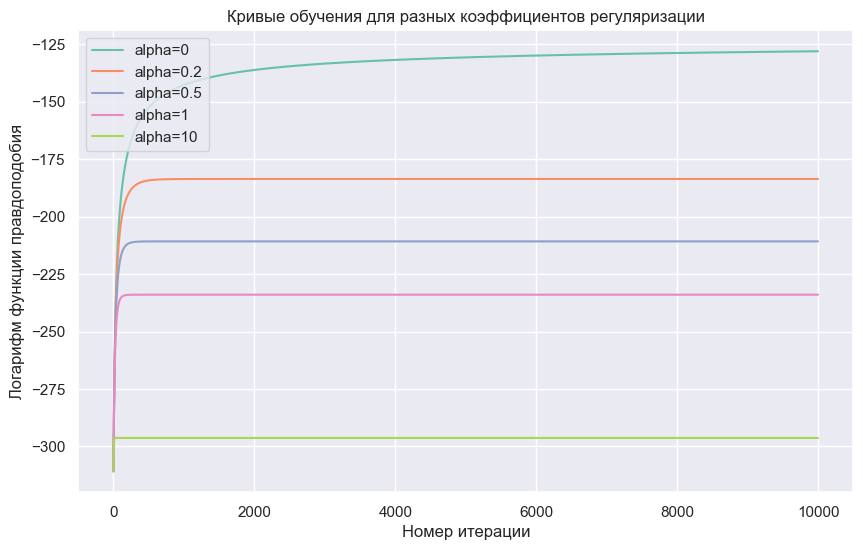

Regularization (alpha): 0, Accuracy: 0.9824561403508771
Regularization (alpha): 0.2, Accuracy: 0.9824561403508771
Regularization (alpha): 0.5, Accuracy: 0.9736842105263158
Regularization (alpha): 1, Accuracy: 0.9649122807017544
Regularization (alpha): 10, Accuracy: 0.9649122807017544


In [132]:
# Построение кривых обучения для разных коэффициентов регуляризации
plt.figure(figsize=(10, 6))

for alpha in alphas:
    plt.plot(history_dict[alpha], label=f'alpha={alpha}')

plt.xlabel('Номер итерации')
plt.ylabel('Логарифм функции правдоподобия')
plt.title('Кривые обучения для разных коэффициентов регуляризации')
plt.legend()
plt.grid(True)
plt.show()

# Вывод значений точности для разных коэффициентов регуляризации
for alpha, acc in accuracy_dict.items():
    print(f"Regularization (alpha): {alpha}, Accuracy: {acc}")

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

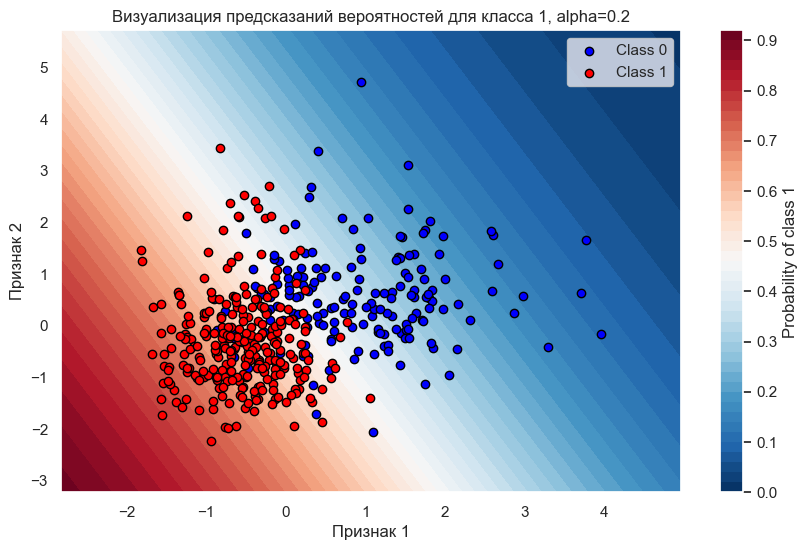

In [134]:
best_model = LogisticRegression(method='gd', criterion='max_iter', fit_intercept=False, max_iter=10000, alpha=0.2, lr=0.01, save_history=True)

# Выбираем два произвольных признака
X_train_two_features = X_train_scaled[:, :2]
X_test_two_features = X_test_scaled[:, :2]


# Обучение модели на двух признаках
best_model.fit(X_train_two_features, Y_train)

# Генерация сетки для визуализации вероятностей
x_min, x_max = X_train_two_features[:, 0].min() - 1, X_train_two_features[:, 0].max() + 1
y_min, y_max = X_train_two_features[:, 1].min() - 1, X_train_two_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Вычисляем вероятности класса 1 для каждой точки сетки
grid_points = np.c_[xx.ravel(), yy.ravel()]
probs = best_model.predict_proba(grid_points)[:, 1]
probs = probs.reshape(xx.shape)

# Визуализация предсказаний вероятностей
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, levels=50, cmap="RdBu_r")
plt.colorbar(label="Probability of class 1")

# Наносим обучающие данные
plt.scatter(X_train_two_features[Y_train == 0, 0], X_train_two_features[Y_train == 0, 1], label='Class 0', color='blue', edgecolor='k')
plt.scatter(X_train_two_features[Y_train == 1, 0], X_train_two_features[Y_train == 1, 1], label='Class 1', color='red', edgecolor='k')

plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title(f"Визуализация предсказаний вероятностей для класса 1, alpha={0.2}")
plt.legend()
plt.grid(True)
plt.show()

model.fit(X_train_scaled, Y_train)

**Вывод:** 

Граница между красной и синей областями соответствует вероятности 0.5 — это линия, где модель не может однозначно решить, к какому классу отнести объекты.
Линия разделения не является прямой, что связано с нелинейным характером распределения данных в пространстве этих признаков.

Регуляризация: На графике можно видеть, что регуляризация сглаживает разделение между классами и помогает создать более плавные границы между классами.

Вероятности: Модель правильно оценивает вероятности для классов, хотя есть небольшие ошибки в переходных зонах, что может быть связано с особенностями данных.